# Лабораторная работа №1

Из списка предложенных датасетов был выбран "Weather Prediction" - https://www.kaggle.com/datasets/ananthr1/weather-prediction

Каждая строка выборки представляет собой реальные данные на определенный день и описывает какая погода была в тот или иной день, сколько выпало осадков, минимальную и максимальную температуры.

Набор данных содержит следующие атрибуты:

* "date" (день наблюдений), с типом данных - дата
* "precipitation" (количество осадков за день (в мм)), с типом данных - число с плавающей точкой
* "temp_max" (максимальная температура за день (в градусах)), с типом данных - число с плавающей точкой
* "temp_min" (минимальная температура за день (в градусах)), с типом данных - число с плавающей точкой
* "wind" (скорость ветра (в м/с)), с типом данных - число с плавающей точкой
* "weather" (прогноз погоды), с типом данных - строка

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weather_dataset.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [58]:
def detect_outliers_iqr(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        LowerBound = Q1 - 1.5 * IQR
        UpperBound = Q3 + 1.5 * IQR

        IQR_Outliers = (df[column] < LowerBound) | (df[column] > UpperBound)

        outlier_values = df[IQR_Outliers][column]

        if not outlier_values.empty:
            print("Выбросы:")
            print(outlier_values)
        else:
            print("Выбросов не обнаружено.")

        number_of_outliers = outlier_values.shape[0]
        print("Количество выбросов, обнаруженных по методу IQR: ", number_of_outliers)

Среднее значение количества осадков: 3.02943189596167
СКО количества осадков:  6.677907759070501
Выбросы:
1       10.9
3       20.3
16       8.1
17      19.8
18      15.2
        ... 
1441    16.0
1446    21.8
1447    18.5
1450    27.4
1456     8.6
Name: precipitation, Length: 206, dtype: float64
Количество выбросов, обнаруженных по методу IQR:  206
Количество пропущенных значений: 0


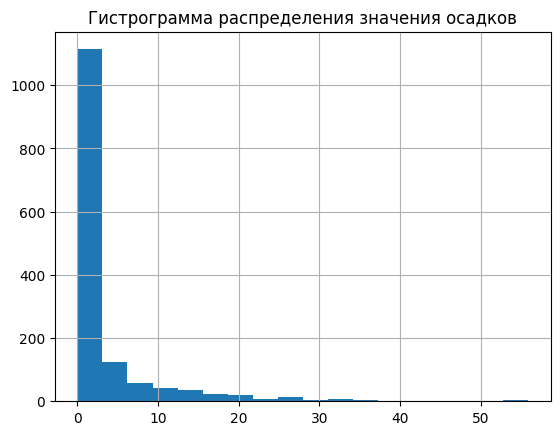

In [61]:
data = df["precipitation"]
plt.hist(data, bins = 18)
plt.grid(True)
plt.title("Гистрограмма распределения значения осадков")

print("Среднее значение количества осадков:", data.mean())
print('СКО количества осадков: ', np.std(data))
detect_outliers_iqr(df, 'precipitation')
print('Количество пропущенных значений:', data.isnull().sum())

Среднее значение максимальной температуры: 16.43908281998631
СКО максимальной температуры:  7.347242349178541
Выбросов не обнаружено.
Количество выбросов, обнаруженных по методу IQR:  0
Количество пропущенных значений: 0


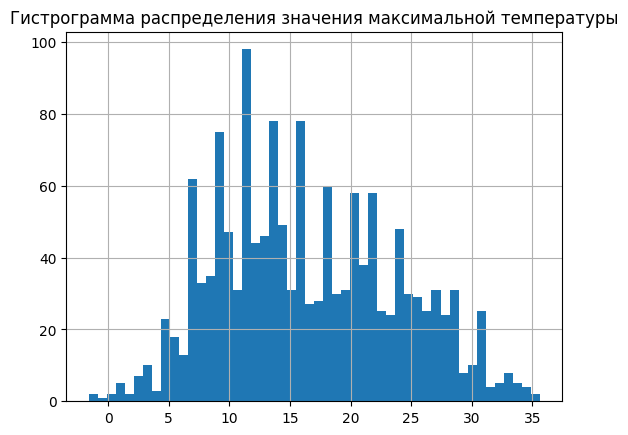

In [87]:
data = df["temp_max"]
plt.hist(data, bins = 50)
plt.grid(True)
plt.title("Гистрограмма распределения значения максимальной температуры")

print("Среднее значение максимальной температуры:", data.mean())
print("СКО максимальной температуры: ", np.std(data))
detect_outliers_iqr(df, "temp_max")
print("Количество пропущенных значений:", data.isnull().sum())

Среднее значения минимальной температуры: 8.234770704996578
СКО минимальной температуры:  5.02128485621418
Выбросов не обнаружено.
Количество выбросов, обнаруженных по методу IQR:  0
Количество пропущенных значений: 0


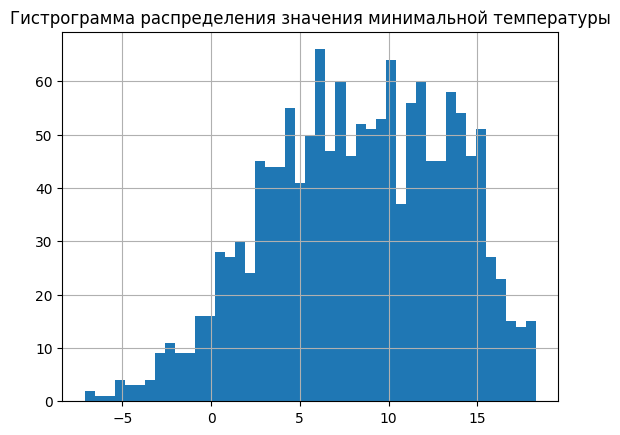

In [90]:
data = df["temp_min"]
plt.hist(data, bins = 45)
plt.grid(True)
plt.title("Гистрограмма распределения значения минимальной температуры")

print("Среднее значения минимальной температуры:", data.mean())
print("СКО минимальной температуры: ", np.std(data))
detect_outliers_iqr(df, "temp_min")
print("Количество пропущенных значений:", data.isnull().sum())

Среднее значения скорости ветра: 3.24113620807666
СКО скорости ветра:  1.4373329058364601
Выбросов не обнаружено.
Количество выбросов, обнаруженных по методу IQR:  0
Количество пропущенных значений: 0


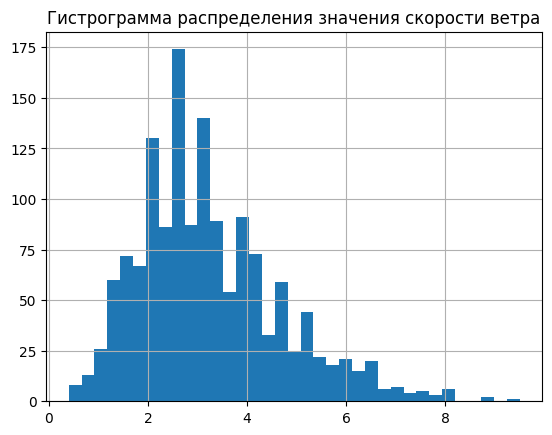

In [92]:
data = df["wind"]
plt.hist(data, bins = 35)
plt.grid(True)
plt.title("Гистрограмма распределения значения скорости ветра")

print("Среднее значения скорости ветра:", data.mean())
print("СКО скорости ветра: ", np.std(data))
detect_outliers_iqr(df, "temp_min")
print("Количество пропущенных значений:", data.isnull().sum())

Корреляционная матрица:
               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


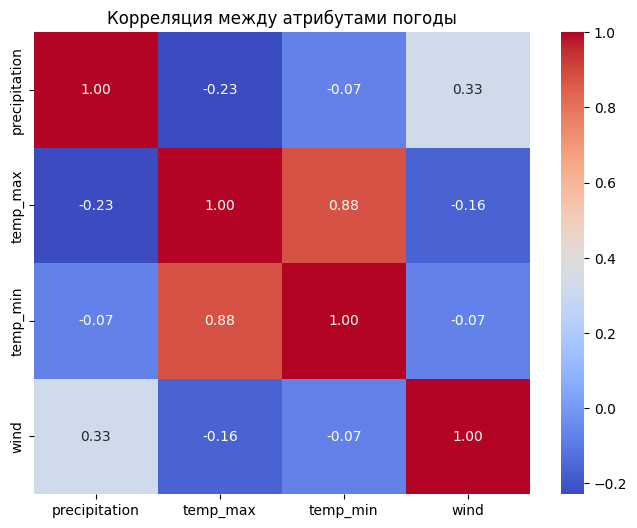

In [80]:
attributes = ['precipitation', 'temp_max', 'temp_min', 'wind']

correlation_matrix = df[attributes].corr()

# Вывод корреляционной матрицы
print("Корреляционная матрица:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между атрибутами погоды')
plt.show()

Исходя из результатов корреляционной матрицы можно сделать вывод, что наибольшая корреляция наблюдается между атрибутами максимальной температуры (temp_max) и минимальной (temp_min), таким образом, это корреляция является положительной и может говорить о сильной зависимости между этими атрибутами.

Между другими атрибутами данной выборки отсутствует корреляция, так как точки расположены хаотично и не образуют каких-либо четких линий или паттернов.

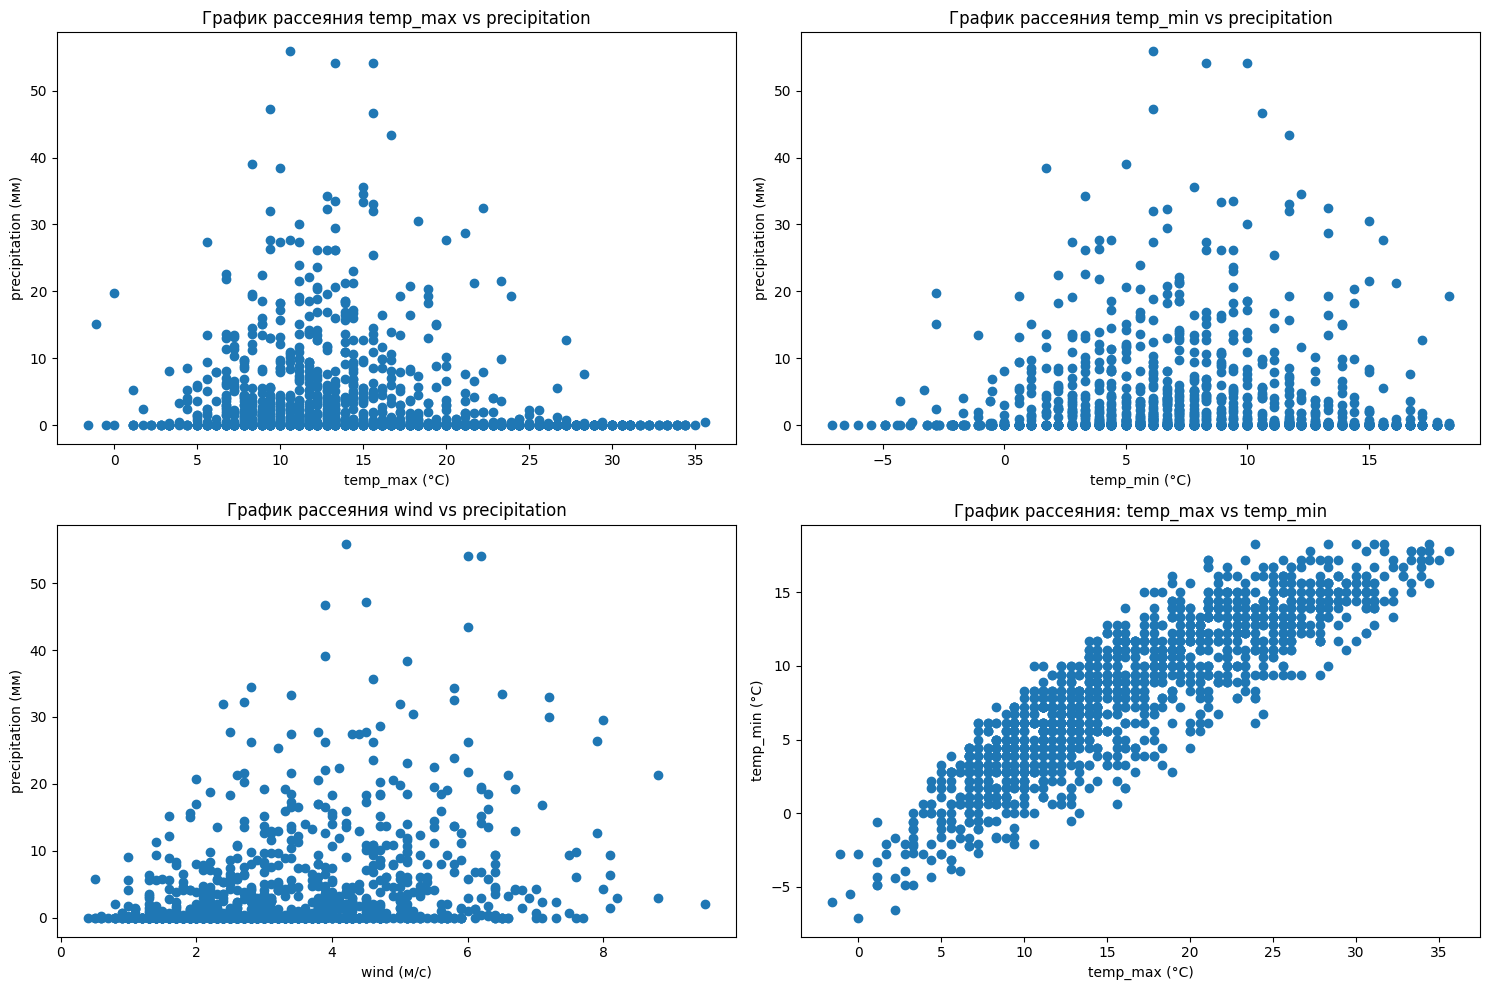

In [94]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(df['temp_max'], df['precipitation'])
plt.title('График рассеяния temp_max vs precipitation')
plt.xlabel('temp_max (°C)')
plt.ylabel('precipitation (мм)')

plt.subplot(2, 2, 2)
plt.scatter(df['temp_min'], df['precipitation'])
plt.title('График рассеяния temp_min vs precipitation')
plt.xlabel('temp_min (°C)')
plt.ylabel('precipitation (мм)')

plt.subplot(2, 2, 3)
plt.scatter(df['wind'], df['precipitation'])
plt.title('График рассеяния wind vs precipitation')
plt.xlabel('wind (м/с)')
plt.ylabel('precipitation (мм)')

plt.subplot(2, 2, 4)
plt.scatter(df['temp_max'], df['temp_min'])
plt.title('График рассеяния: temp_max vs temp_min')
plt.xlabel('temp_max (°C)')
plt.ylabel('temp_min (°C)')

plt.tight_layout()
plt.show()

На графике рессеяния минимальной и максимальной температур отчетливо видно положительную корреляцию, а значит что изменение в одном из атрибутов нарямую влияет на другой атрибут.

На остальных графиках рессеяния видно, что корреляция отсутствует, что говорит об отсутствии между этими атрибутами связи.